# Relevant code for the projects

The following snippets of code perform some of the basic operations required for the projects.

Feel free to modify them, or to use alternative solutions, when you include them in your exercise.

In [1]:
# Loading some relevant librarires
# Note: the installation of the libraries follows the same instruction as the radar exercise
import csv
import datetime
import scipy
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict
import pandas as pd
import os
import pickle 
import re

## 1. Loading variables from a NetCDF file

Many of the data files provided for the project are in the NetCDF format.
The following lines of code will allnetCDF4 to open the files, list the available variables, and store one (or more) of them in a numpy array.

**Note:** from the code below, only the four arrays defined at the end will be available for the rest of the notebook.

In [3]:
#locations = ['europe', 'greenland', 'northamerica']
locations = ['oceanie', 'southamerica', 'tropicpacifics', 'tropicsouthafrica', 'tropicsouthamerica']
model = ['ssp2', 'ssp5']
directory = 'data_climate_modeling'
chosen_var_name = ['rh2m', 'q2m','tsol_ter']

In [9]:
def loading_datas_to_pickle(directory):
    v = {}
    v100 = {}
    for foldername in os.listdir(directory):
        if foldername == '.ipynb_checkpoints':
            continue 
        fold = os.path.join(directory, foldername)
        count = 1
        print(foldername)
        for filename in sorted(os.scandir(fold), key=lambda e: e.name): 
            if filename.is_file():
                #print('\n', filename.path)
                with nc.Dataset(filename.path, 'r') as input_netcdf_f:
                    chosen_var_content = input_netcdf_f[chosen_var_name[0]]
                    #print('\nInfo about %s:\n' % chosen_var_name, chosen_var_content)

                    variable_time = input_netcdf_f.variables['time_counter']
                    variable_lat = input_netcdf_f.variables['lat']
                    variable_lon = input_netcdf_f.variables['lon']

                    #print('\nInfo about time (as variable):\n', variable_time)
                    re.search('^data_([a-zA-Z]+)_(ssp[0-9]+)_[0-9]+$', foldername)

                    specifics = re.search('^data_([a-z]+)_(ssp[0-9]+)_[0-9]+$', foldername)

                    v["time_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(variable_time)
                    v["lat_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(variable_lat)
                    v["lon_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(variable_lon)

                    v[chosen_var_name[0] + "_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(input_netcdf_f[chosen_var_name[0]])

                    v[chosen_var_name[1] + "_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(input_netcdf_f[chosen_var_name[1]])
                    
                    v[chosen_var_name[2] + "_array_" + specifics.groups()[0] + '_'
                      + specifics.groups()[1] + '_'+ str(count)] = np.array(input_netcdf_f[chosen_var_name[2]])


                    count += 1

        reference_start_date = datetime.datetime(2015, 1, 1, 0, 0) # <- the reference start date of 2015-01-01
        time_array_oceanie_ssp2_100 = np.array(['time_array_oceanie_ssp2_1'])

        v100[chosen_var_name[0]+ '_array_' + specifics.groups()[0] + '_' + 
          specifics.groups()[1] +'_' + str(100)] = np.array(v['rh2m_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])
        v100[chosen_var_name[1]+ '_array_' + specifics.groups()[0] + '_' + 
          specifics.groups()[1] +'_' + str(100)] = np.array(v['q2m_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])
        v100[chosen_var_name[2]+ '_array_' + specifics.groups()[0] + '_' + 
          specifics.groups()[1] +'_' + str(100)] = np.array(v['tsol_ter_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])

        v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])] = np.array(v['time_array_%s_%s_1' % (specifics.groups()[0], specifics.groups()[1])])

        for i in range(2, count):
            v100[chosen_var_name[0]+ '_array_' + specifics.groups()[0] + '_' + 
                specifics.groups()[1] +'_' + str(100)] = np.concatenate((v100[chosen_var_name[0]+ '_array_' + 
                specifics.groups()[0] + '_' +  specifics.groups()[1] +'_' + str(100)], v['rh2m_array_%s_%s_%d' %(specifics.groups()[0], specifics.groups()[1], i)]))
            v100[chosen_var_name[1]+ '_array_' + specifics.groups()[0] + '_' + 
                specifics.groups()[1] +'_' + str(100)] = np.concatenate((v100[chosen_var_name[1]+ '_array_' +
                specifics.groups()[0] + '_' +  specifics.groups()[1] +'_' + str(100)], v['q2m_array_%s_%s_%d' %(specifics.groups()[0], specifics.groups()[1], i)]))
            v100[chosen_var_name[2]+ '_array_' + specifics.groups()[0] + '_' + 
                specifics.groups()[1] +'_' + str(100)] = np.concatenate((v100[chosen_var_name[2]+ '_array_' +
                specifics.groups()[0] + '_' +  specifics.groups()[1] +'_' + str(100)], v['tsol_ter_array_%s_%s_%d' %(specifics.groups()[0], specifics.groups()[1], i)]))
            v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])] =  np.append(v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])], v['time_array_%s_%s_%d'%(specifics.groups()[0], specifics.groups()[1], i)])
        v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])] = [reference_start_date + datetime.timedelta(seconds=int(t)) for t in v100['time_array_%s_%s_100'% (specifics.groups()[0], specifics.groups()[1])]]
    #print("Values contained in V:\n", v.keys())
    print("\nValues contained in v100 (V_concatenated):\n", v100.keys())
    
    return v, v100 
    
#v, v100 = loading_datas_to_pickle(directory)    
    

In [10]:
with open('dico_v_south.pickle', 'rb') as handle:
    v = pickle.load(handle)
with open('dico_v100_south.pickle', 'rb') as handle:
    v100 = pickle.load(handle)

In [11]:
v100.keys()

dict_keys(['rh2m_array_southamerica_ssp2_100', 'q2m_array_southamerica_ssp2_100', 'tsol_ter_array_southamerica_ssp2_100', 'time_array_southamerica_ssp2_100', 'rh2m_array_oceanie_ssp5_100', 'q2m_array_oceanie_ssp5_100', 'tsol_ter_array_oceanie_ssp5_100', 'time_array_oceanie_ssp5_100', 'rh2m_array_tropicsouthamerica_ssp2_100', 'q2m_array_tropicsouthamerica_ssp2_100', 'tsol_ter_array_tropicsouthamerica_ssp2_100', 'time_array_tropicsouthamerica_ssp2_100', 'rh2m_array_tropicsouthamerica_ssp5_100', 'q2m_array_tropicsouthamerica_ssp5_100', 'tsol_ter_array_tropicsouthamerica_ssp5_100', 'time_array_tropicsouthamerica_ssp5_100', 'rh2m_array_tropicsouthafrica_ssp5_100', 'q2m_array_tropicsouthafrica_ssp5_100', 'tsol_ter_array_tropicsouthafrica_ssp5_100', 'time_array_tropicsouthafrica_ssp5_100', 'rh2m_array_tropicsouthafrica_ssp2_100', 'q2m_array_tropicsouthafrica_ssp2_100', 'tsol_ter_array_tropicsouthafrica_ssp2_100', 'time_array_tropicsouthafrica_ssp2_100', 'rh2m_array_southamerica_ssp5_100', 'q2

In [12]:
for loc in locations:
    for mod in model: 
        print(len(v100['time_array_%s_%s_100' % (loc, mod)]))

1032
960
1032
960
1032
960
1032
960
1032
960


In [13]:
for loc in locations: 
    for mod in model: 
        print(loc, mod)
        #print(v100['rh2m_array_%s_%s_100' % (loc, mod)].shape)
        #print(np.isnan(v100['rh2m_array_%s_%s_100' % (loc, mod)]).sum()) No NaN in dataset
        print(v100['rh2m_array_%s_%s_100' % (loc, mod)].mean(axis = (0,1,2)))
        print(v100['rh2m_array_%s_%s_100' % (loc, mod)].std(axis = (0,1,2)))
        
        


oceanie ssp2
73.60413
13.740621
oceanie ssp5
73.70375
13.884912
southamerica ssp2
76.24787
13.931186
southamerica ssp5
75.67491
14.277009
tropicpacifics ssp2
79.59489
4.4943876
tropicpacifics ssp5
79.8292
4.599204
tropicsouthafrica ssp2
68.57036
19.259222
tropicsouthafrica ssp5
68.05573
19.275398
tropicsouthamerica ssp2
75.79696
12.962902
tropicsouthamerica ssp5
74.99805
13.427153


/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


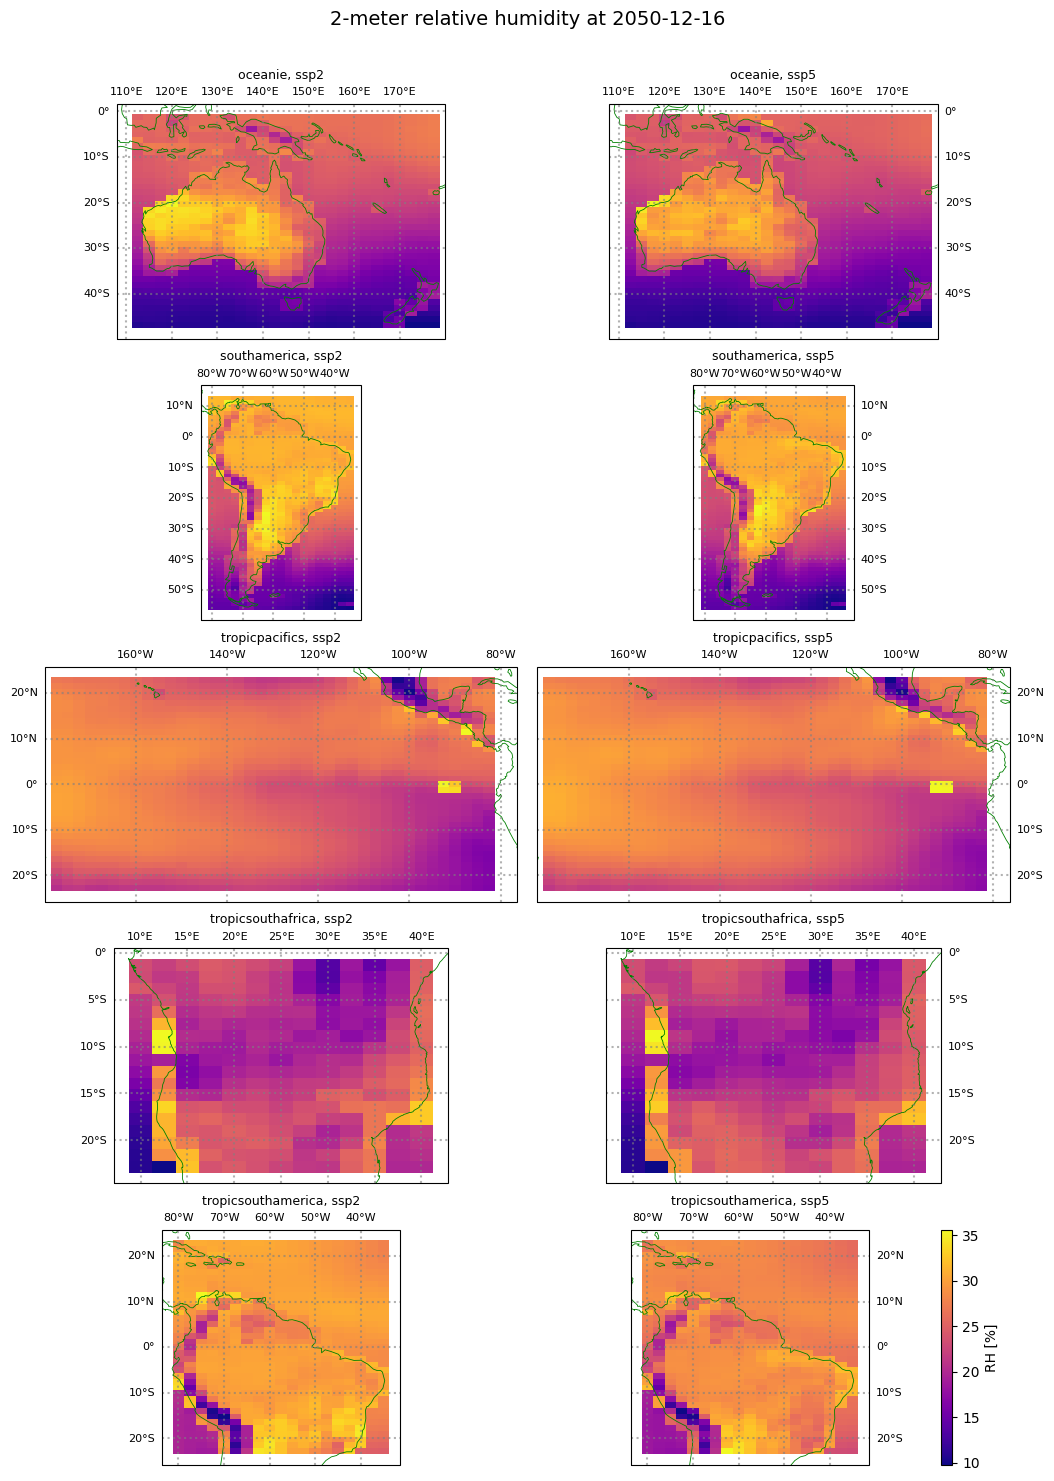

In [14]:
fig, ax = plt.subplots(nrows= len(locations), ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (10,15))
cmap = 'plasma'

#chosen_time = np.array([12,2020])
chosen_time = "12-2050"  #Enter a date. Format = '%m-%Y'"
##chosen_time_index = (chosen_time[1] - 2015)*12 + chosen_time[0] - 1
chosen_time_index = (int(chosen_time.split('-')[1]) -2015)*12 + int(chosen_time.split('-')[0]) -1
fig.suptitle('2-meter relative humidity at %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=14)
fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)
for i, loc in enumerate(locations): 
    for j, mod in enumerate(model):
        chosen_time_index
        lon_array = np.array(v['lon_array_%s_%s_1' % (loc, mod)])
        lat_array = np.array(v['lat_array_%s_%s_1' % (loc, mod)])
        mappable = ax[i,j].pcolormesh(lon_array, lat_array, v100['tsol_ter_array_%s_%s_100'% (loc, mod)][chosen_time_index]-273.3, cmap = cmap)
        
        ax[i,j].set_xlabel('Longitude [°]')
        ax[i,j].set_ylabel('Latitude [°]')
        ax[i,j].set_title('%s, %s' %(loc, mod), fontsize = 9)
        ax[i,j].coastlines(color='green', linewidth=0.6)
        
        gl = ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
        gl.xlabel_style = {'size':8} 
        gl.ylabel_style = {'size':8}
        gl.xlabels_bottom = False 
        if (j+1)%2 == 0:
            gl.ylabels_left = False 
        else:
            gl.ylabels_right = False 
            
fig.colorbar(mappable=mappable, label='RH [%]', pad = .15)
fig.show()

pass
        

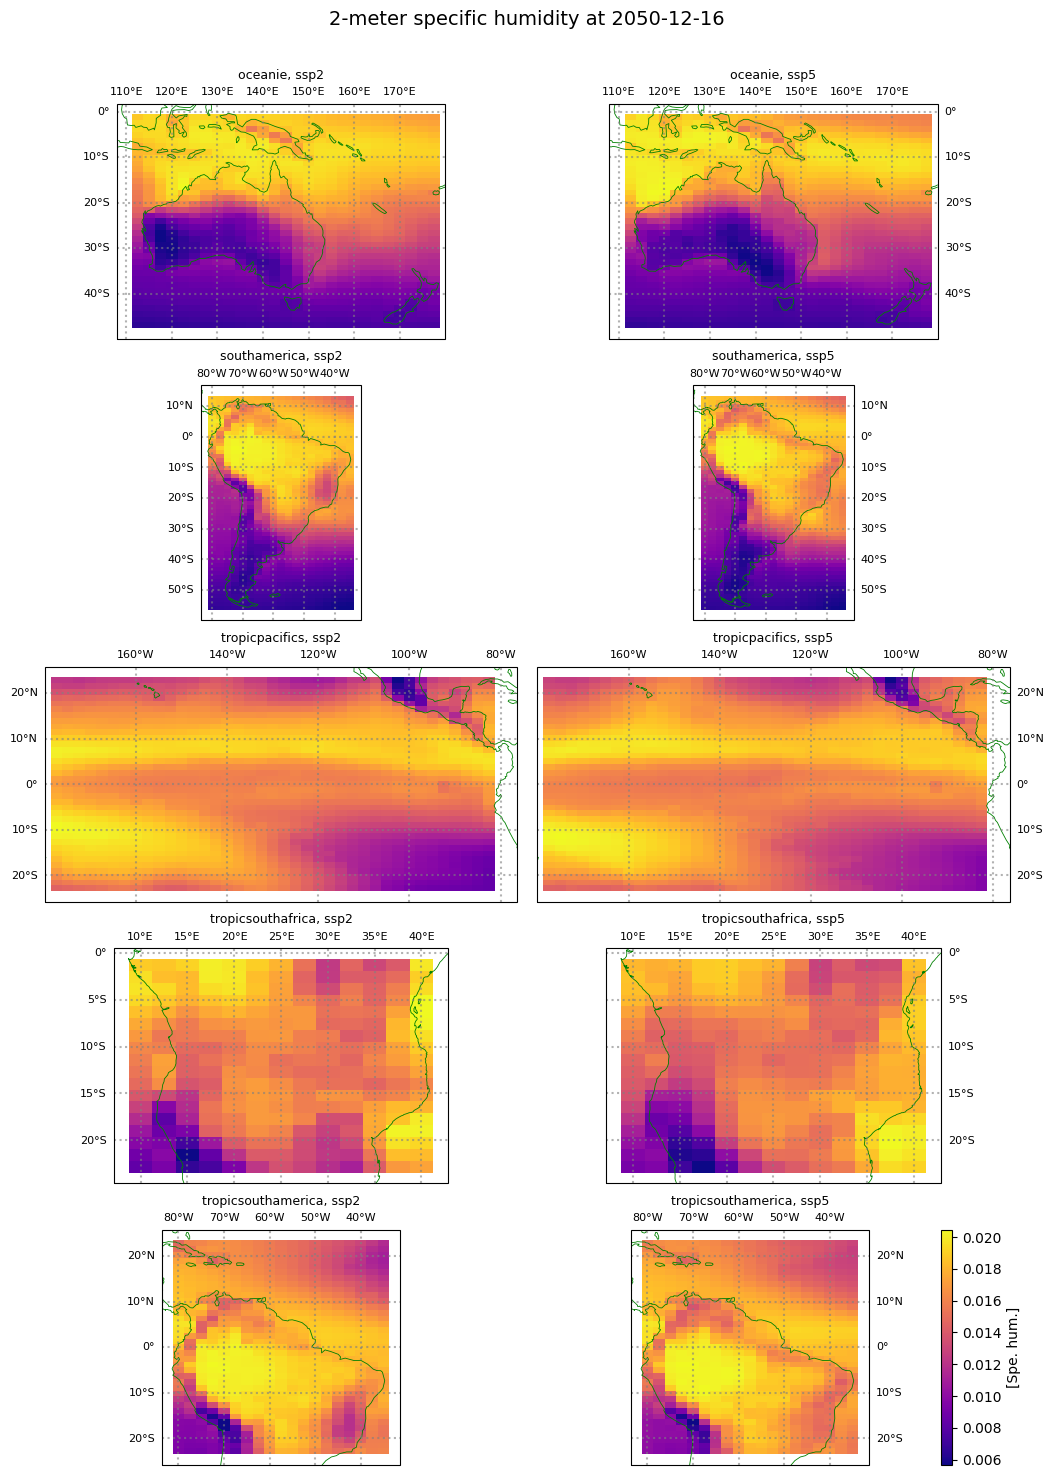

In [15]:
fig, ax = plt.subplots(nrows= len(locations), ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (10,15))
cmap = 'plasma'

#chosen_time = np.array([12,2020])
chosen_time = "12-2050"  #Enter a date. Format = '%m-%Y'"
##chosen_time_index = (chosen_time[1] - 2015)*12 + chosen_time[0] - 1
chosen_time_index = (int(chosen_time.split('-')[1]) -2015)*12 + int(chosen_time.split('-')[0]) -1
fig.suptitle('2-meter specific humidity at %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=14)
fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)
for i, loc in enumerate(locations): 
    for j, mod in enumerate(model):
        chosen_time_index
        lon_array = np.array(v['lon_array_%s_%s_1' % (loc, mod)])
        lat_array = np.array(v['lat_array_%s_%s_1' % (loc, mod)])
        mappable = ax[i,j].pcolormesh(lon_array, lat_array, v100['q2m_array_%s_%s_100'% (loc, mod)][chosen_time_index], cmap = cmap)
        
        ax[i,j].set_xlabel('Longitude [°]')
        ax[i,j].set_ylabel('Latitude [°]')
        ax[i,j].set_title('%s, %s' %(loc, mod), fontsize = 9)
        ax[i,j].coastlines(color='green', linewidth=0.6)
        
        gl = ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
        gl.xlabel_style = {'size':8} 
        gl.ylabel_style = {'size':8}
        gl.xlabels_bottom = False 
        if (j+1)%2 == 0:
            gl.ylabels_left = False 
        else:
            gl.ylabels_right = False 
            
fig.colorbar(mappable=mappable, label='[Spe. hum.]', pad = .15)
fig.show()

        
pass

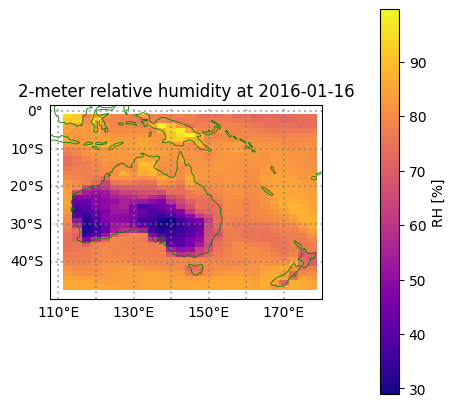

In [21]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())

lon_array = np.array(v['lon_array_oceanie_ssp2_1'])
lat_array = np.array(v['lat_array_oceanie_ssp2_1'])
cmap = 'plasma'

mappable = ax.pcolormesh(lon_array, lat_array, v100['rh2m_array_oceanie_ssp2_100'][12], cmap = cmap) # <- we added a ".T" to the relative_hum array to transpose it, since we want the longitude on the x-axis

ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')
ax.set_title('2-meter relative humidity at %s' % v100['time_array_oceanie_ssp2_100'][12].strftime('%Y-%m-%d'))
ax.coastlines(color='green', linewidth=0.6)

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
plt.colorbar(mappable=mappable, label='RH [%]', pad = .15)
pass

In [22]:

#print('%s, %s' %(loc, mod))
lat_array = v['lat_array_%s_%s_1' % (loc, mod)]
lon_array = v['lon_array_%s_%s_1' % (loc, mod)]



print('\nAll longitude values available: ', lon_array )
print('\nLength Lon array: ', len(lon_array))
print('\nAll latitude values available: ', lat_array)
print('\nLength Lon array: ', len(lat_array))

print('\n')


All longitude values available:  [-80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5 -60.  -57.5 -55.  -52.5
 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35. ]

Length Lon array:  19

All latitude values available:  [ 22.816902   21.549295   20.28169    19.014084   17.746479   16.478872
  15.211267   13.943662   12.676056   11.408451   10.140845    8.8732395
   7.6056337   6.338028    5.0704226   3.8028169   2.5352113   1.2676057
   0.         -1.2676057  -2.5352113  -3.8028169  -5.0704226  -6.338028
  -7.6056337  -8.8732395 -10.140845  -11.408451  -12.676056  -13.943662
 -15.211267  -16.478872  -17.746479  -19.014084  -20.28169   -21.549295
 -22.816902 ]

Length Lon array:  37




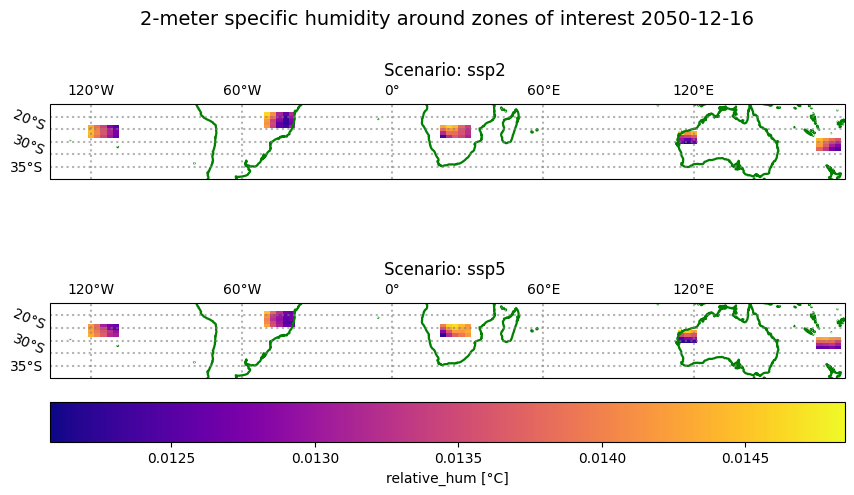

In [23]:
#Coordinates of the zones we want
#West Oceanie: 20°S,113°E ; 20°S, 119°E; 23°S, 113°E; 23°S, 119°N
#East America: 21°S,45°E; 21°S,50°E;  23°S, 50°E; 23°S, 45°E; 
#Central Africa: 18, 22; 18,28; 21,22; 21,28
#West Pacific:   20, 170; 20, 175; 23, 170; 23, 175
#East Pacific:   20, 113°W, 20, 120; 23, 113; 23,120

chosen_time = "12-2050"  #Enter a date. Format = '%m-%Y'"
##chosen_time_index = (chosen_time[1] - 2015)*12 + chosen_time[0] - 1
chosen_time_index = (int(chosen_time.split('-')[1]) -2015)*12 + int(chosen_time.split('-')[0]) -1
zones_file = ['oceanie', 'southamerica', 'tropicsouthafrica', 'oceanie', 'tropicpacifics']
zones = ['australie', 'brazil', 'centralAfrica', 'oceanNewGuinea', 'oceanChili']
min_lat = [-26, -20, -23, -28, -23]
max_lat = [-21, -13, -18, -23, -18]
min_lon = [113, -50, 20, 170, -120]
max_lon = [122, -38, 30, 180, -110]

fig, ax = plt.subplots(nrows= 2, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (8,5))

cmap = 'plasma'

fig.suptitle('2-meter specific humidity around zones of interest %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=14)
fig.tight_layout(pad = 0.2, h_pad = 0.03)

# Before defining the region, we need to create a couple of 2-dimensional array, which contain the latitude and longitude values in a grid.
for j, mod in enumerate(model): 
    
    for i in range(len(zones_file)):

        lon_array = np.array(v['lon_array_%s_%s_1' % (zones_file[i], mod)])
        lat_array = np.array(v['lat_array_%s_%s_1' % (zones_file[i], mod)])
        time_array = np.array(v100['time_array_%s_%s_100' % (zones_file[i], mod)])
        rh2m_array = np.array(v100['rh2m_array_%s_%s_100' % (zones_file[i], mod)])
        q2m_array = np.array(v100['q2m_array_%s_%s_100' % (zones_file[i], mod)])
        tsol_ter_array = np.array(v100['tsol_ter_array_%s_%s_100' % (zones_file[i], mod)])
        
        lon_2d, lat_2d = np.meshgrid(lon_array, lat_array)
        #print('The size of the 2-dimensional latitude and longitude arrays are: ', lat_2d.shape, lon_2d.shape)

        # With the boundaries, we can now define a set of boolean conditions. These will be two 2-dimensional array, one for each region, having the values:
        # - "True" at the indices of the array that are within the region
        # - "False" for the ones outside.
        conditions_within_zones = np.logical_and(np.logical_and(lon_2d >= min_lon[i], lon_2d <= max_lon[i]),
                                                          np.logical_and(lat_2d >= min_lat[i], lat_2d <= max_lat[i])) 

        num_valid_lon_zones = np.sum(conditions_within_zones, axis = 1).max()
        num_valid_lat_zones = np.sum(conditions_within_zones, axis = 0).max()

        #print('\nNumber of valid latitudes in the island region: ', num_valid_lat_zones)
        #print('Number of valid longitudes in the island region: ', num_valid_lon_zones)

        rh2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)
        q2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)
        tsol_ter_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)



        for index_time in range(time_array.shape[0]):
            rh2m_at_current_time = rh2m_array[index_time, :]
            rh2m_zones[index_time, :] = rh2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

            q2m_at_current_time = q2m_array[index_time, :]
            q2m_zones[index_time, :] = q2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
            
            tsol_ter_at_current_time = tsol_ter_array[index_time, :]
            tsol_ter_zones[index_time, :] = tsol_ter_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
            
        v100['rh2m_constrained_array_%s_%s_100' % (zones[i], mod)] = rh2m_zones
        v100['q2m_constrained_array_%s_%s_100' % (zones[i], mod)] = q2m_zones
        v100['tsol_ter_constrained_array_%s_%s_100' % (zones[i], mod)] = tsol_ter_zones

        # Let us visualize the regions that we extracted.
        # Since we have a 2-dimensional array at each time step, we have to select a specific time step for the plot.
        # Let's select the same one we used in the previous example, so we can compare the relative_hum value to make sure that we selected the correct regions.
        rh2m_zones_at_chosen_time = rh2m_zones[chosen_time_index, :, :]
        q2m_zones_at_chosen_time = q2m_zones[chosen_time_index, :, :]
        tsol_ter_zones_at_chosen_time = tsol_ter_zones[chosen_time_index, :, :]

        
        # We also need to define the lat and lon array for the two regions, so that we have the coordinates for the plot
        lon_2d_zones = lon_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
        lat_2d_zones = lat_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

        rh2m_min_in_plot = 0 
        rh2m_max_in_plot = 100 
        
        q2m_min_in_plot = q2m_zones_at_chosen_time.min()-0.0005
        q2m_max_in_plot = q2m_zones_at_chosen_time.max()+0.0005
        #mappable = ax[j].pcolormesh(lon_2d_zones, lat_2d_zones, rh2m_zones_at_chosen_time, cmap=cmap, vmin=rh2m_min_in_plot, vmax=rh2m_max_in_plot)
        mappable = ax[j].pcolormesh(lon_2d_zones, lat_2d_zones, q2m_zones_at_chosen_time, cmap=cmap, vmin=q2m_min_in_plot, vmax=q2m_max_in_plot)

    # Adding the same extra info as before
    ax[j].set_title('Scenario: %s '% mod)
    ax[j].coastlines(color='green', linewidth=1.6)
    ax[j].set(ylim=(-40 , -10))

    gl = ax[j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
    gl.bottom_labels = False 
    gl.right_labels = False
plt.colorbar(mappable=mappable,   label='relative_hum [°C]', pad=0.1, orientation = 'horizontal',fraction = 0.4 )
pass 

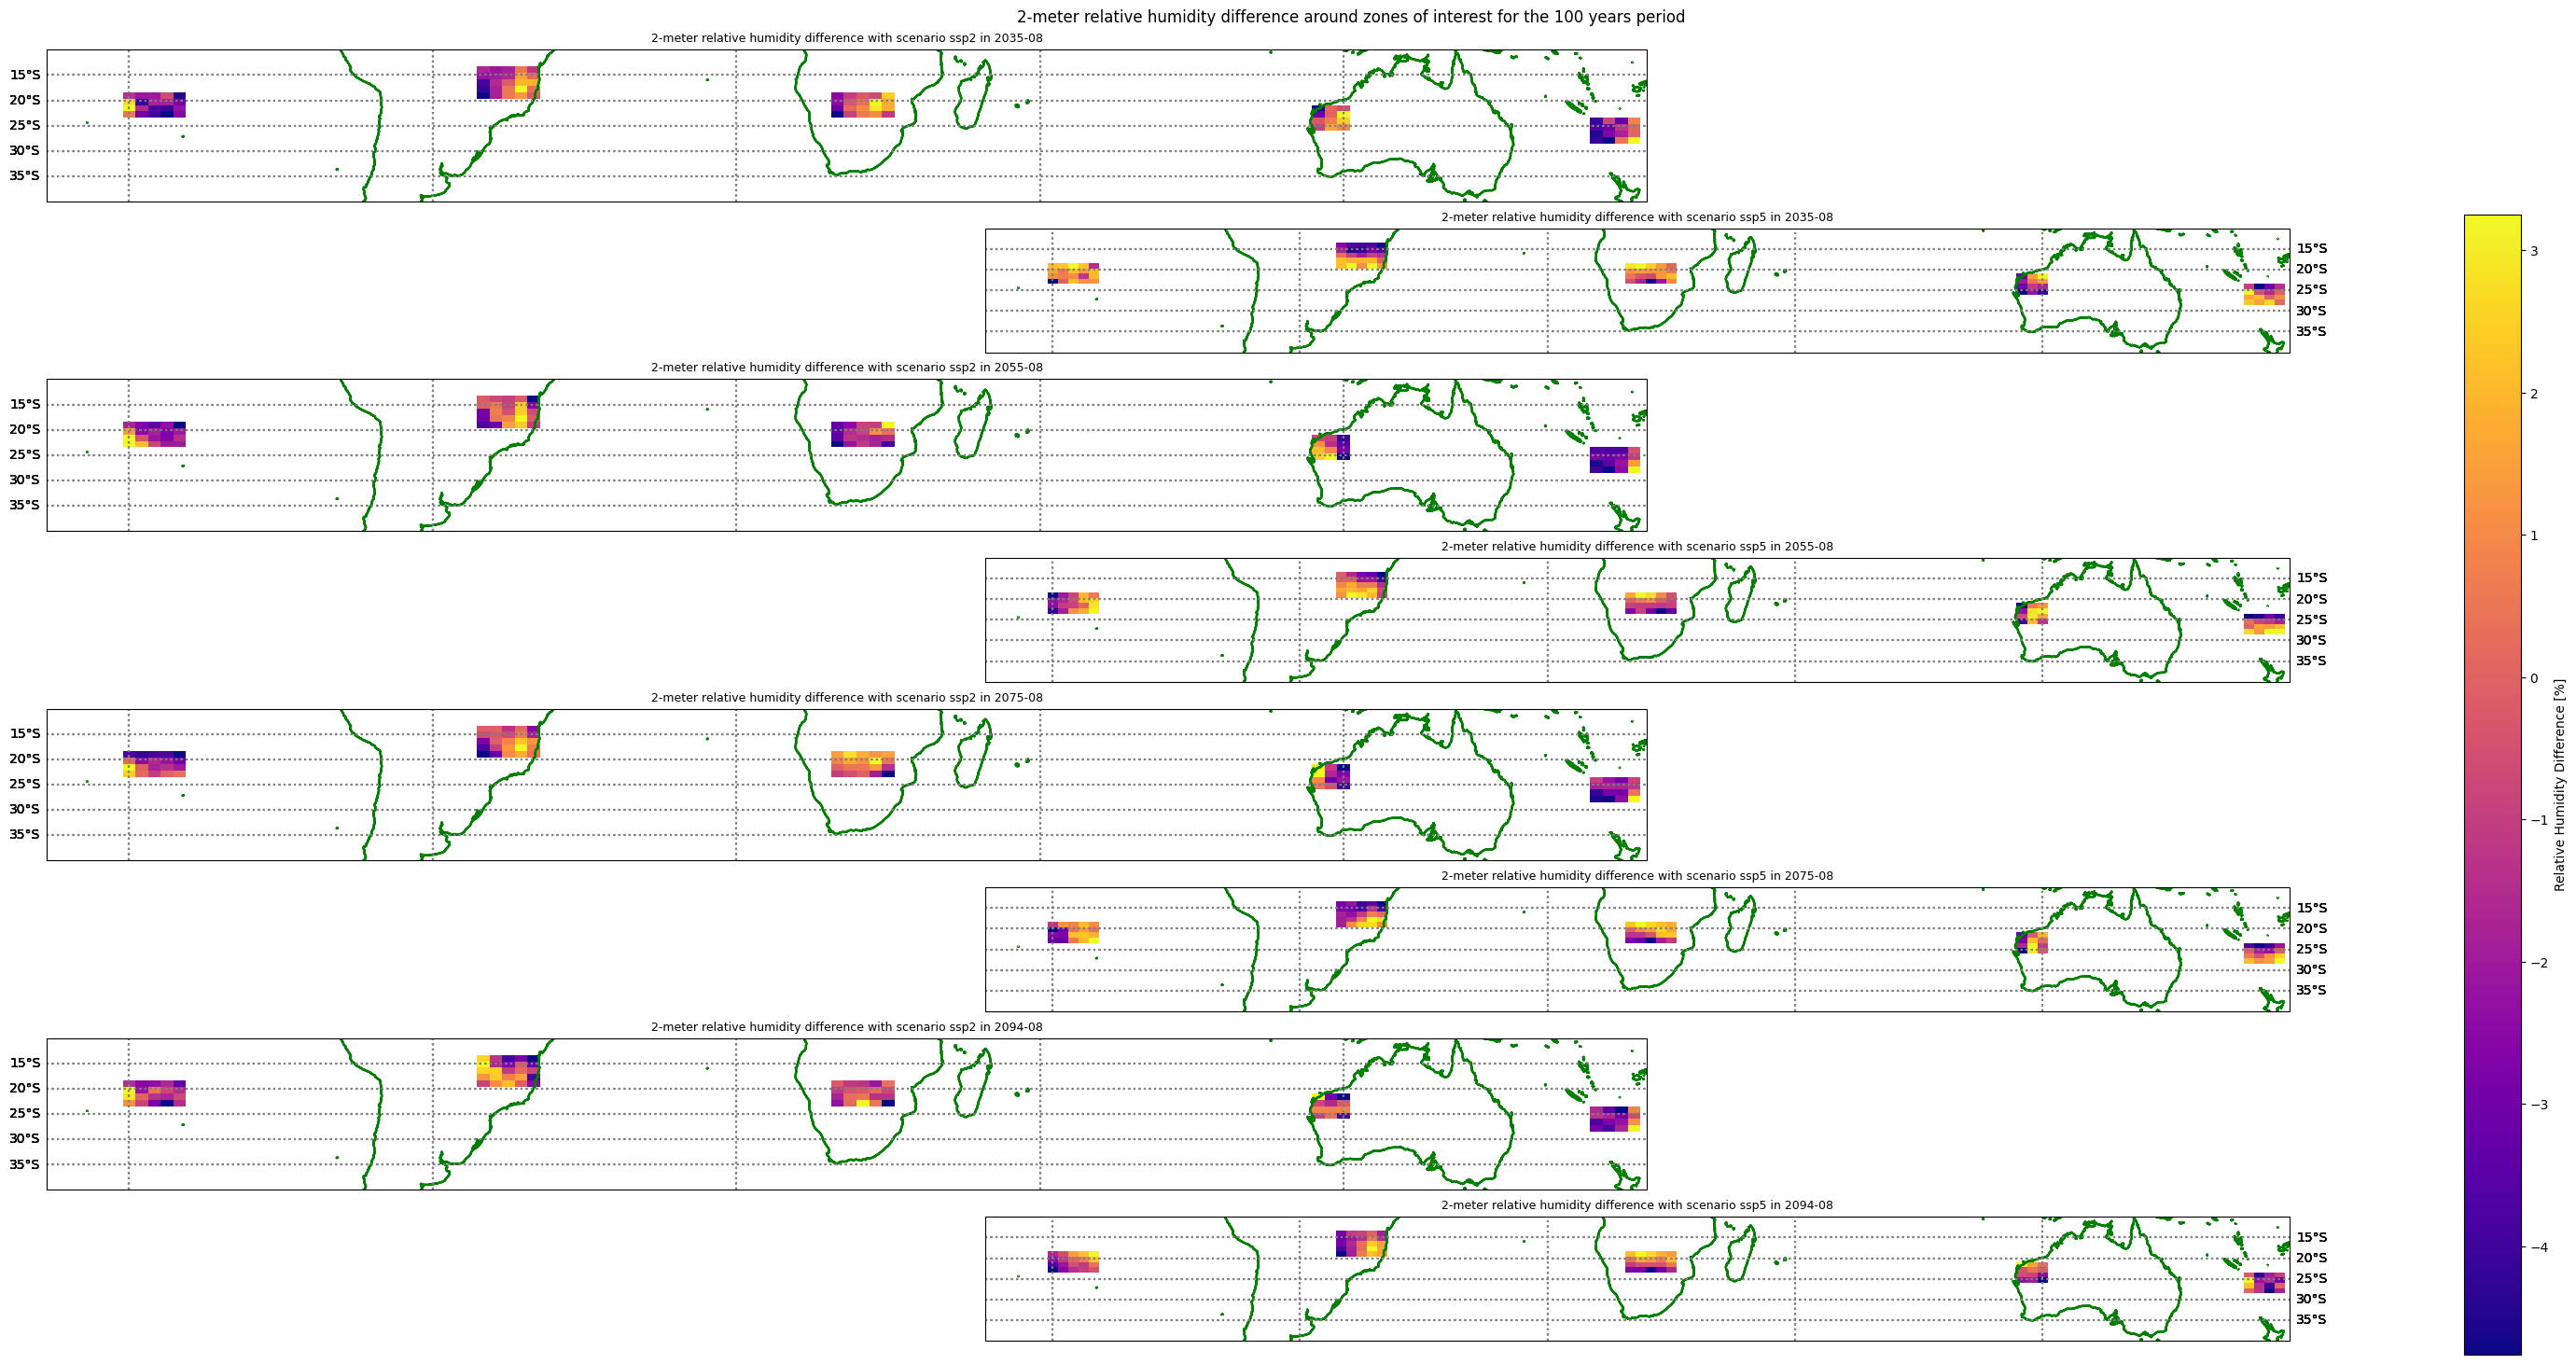

In [25]:
from matplotlib.figure import figaspect

dates = ["08-2035", "08-2055", "08-2075", "08-2094"]
fig, ax = plt.subplots(nrows= 2*len(dates), ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (30,15), gridspec_kw={'width_ratios': [0.2,0.2]})

cmap = 'plasma'

fig.suptitle('2-meter relative humidity difference around zones of interest for the 100 years period' )
fig.tight_layout(pad = 2, h_pad = 1)

position = -1
chosen_time_reference = "08-2015"
chosen_time_ref_index =  (int(chosen_time_reference.split('-')[1]) -2015)*12 + int(chosen_time_reference.split('-')[0]) -1


for k, dat in enumerate(dates):
    for j, mod in enumerate(model): 
        position += 1
        for i in range(len(zones_file)):
       
            chosen_time_index = (int(dat.split('-')[1]) -2015)*12 + int(dat.split('-')[0])-1              
            
            lon_array = np.array(v['lon_array_%s_%s_1' % (zones_file[i], mod)])
            lat_array = np.array(v['lat_array_%s_%s_1' % (zones_file[i], mod)])
            time_array = np.array(v100['time_array_%s_%s_100' % (zones_file[i], mod)])
            rh2m_array = np.array(v100['rh2m_array_%s_%s_100' % (zones_file[i], mod)])
            q2m_array = np.array(v100['q2m_array_%s_%s_100' % (zones_file[i], mod)])

            lon_2d, lat_2d = np.meshgrid(lon_array, lat_array)
      
            conditions_within_zones = np.logical_and(np.logical_and(lon_2d >= min_lon[i], lon_2d <= max_lon[i]),
                                                              np.logical_and(lat_2d >= min_lat[i], lat_2d <= max_lat[i])) 

            num_valid_lon_zones = np.sum(conditions_within_zones, axis = 1).max()
            num_valid_lat_zones = np.sum(conditions_within_zones, axis = 0).max()


            rh2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)
            q2m_zones = np.full((time_array.shape[0], num_valid_lat_zones, num_valid_lon_zones), np.nan)


            for index_time in range(time_array.shape[0]):
                rh2m_at_current_time = rh2m_array[index_time, :]
                rh2m_zones[index_time, :] = rh2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

                q2m_at_current_time = q2m_array[index_time, :]
                q2m_zones[index_time, :] = q2m_at_current_time[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

            rh2m_zones_at_chosen_time = rh2m_zones[chosen_time_index, :, :]
            q2m_zones_at_chosen_time = q2m_zones[chosen_time_index, :, :]
            
            rh2m_zones_difference = rh2m_zones_at_chosen_time - rh2m_zones[chosen_time_ref_index,:,:]


            # We also need to define the lat and lon array for the two regions, so that we have the coordinates for the plot
            lon_2d_zones = lon_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)
            lat_2d_zones = lat_2d[conditions_within_zones].reshape(num_valid_lat_zones, num_valid_lon_zones)

            rh2m_min_in_plot = 0 
            rh2m_max_in_plot = 100 

            q2m_min_in_plot = q2m_zones_at_chosen_time.min()-0.0005
            q2m_max_in_plot = q2m_zones_at_chosen_time.max()+0.0005
            #mappable = ax[j].pcolormesh(lon_2d_zones, lat_2d_zones, rh2m_zones_at_chosen_time, cmap=cmap, vmin=rh2m_min_in_plot, vmax=rh2m_max_in_plot)
            mappable = ax[position][j].pcolormesh(lon_2d_zones, lat_2d_zones, rh2m_zones_difference, cmap=cmap)#, vmin=rh2m_min_in_plot, vmax=rh2m_max_in_plot)    
            ax[position][j].coastlines(color='green', linewidth=1.6)
            ax[position][j].set(ylim=(-40 , -10))
            ax[position][j].set_title('2-meter specific humidity around zones of interest %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m-%d'), fontsize=7)

            gl = ax[position][j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
           
            gl.top_labels = False
            if j == 0:
                ax[position][j].set_title('2-meter relative humidity difference with scenario ssp2 in %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m'), fontsize=9)
                gl.bottom_labels = False 
                gl.right_labels = False
            elif j == 0 & position == 0:
                gl.top_labels = True
            else: 
                ax[position][j].set_title('2-meter relative humidity difference with scenario ssp5 in %s' % v100['time_array_oceanie_ssp2_100'][chosen_time_index].strftime('%Y-%m'), fontsize=9)
                gl.bottom_labels = False 
                gl.left_labels = False
            
                
#plt.figtext(0.1', ha='center', va='center')               
plt.colorbar(mappable=mappable,   label='Relative Humidity Difference [%]', pad=0.1, orientation = 'vertical', ax = ax[1:8,1])
for i in range(2*len(dates)):
    j = i % 2 -1 
    fig.delaxes(ax[i][j])  
pass 

plt.savefig('labiteahogge.png')

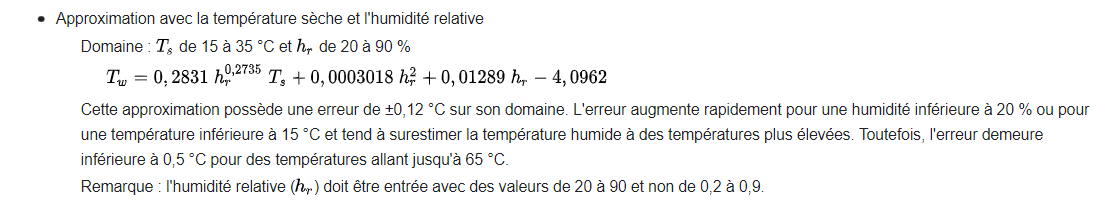 <br>
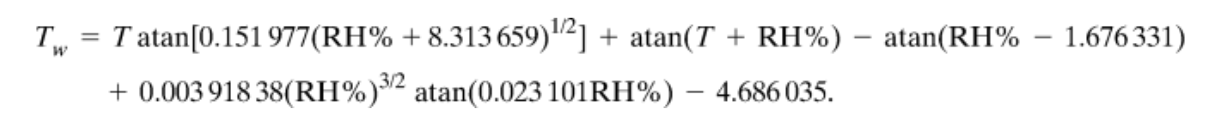

In [38]:
#Température humide
def temperature_humide(humidity, dry_temp):
    #tw = 0.281*pow(humidity, 0.2735)* dry_temp + 0.0003018*pow(humidity, 2) + 0.01289 * humidity - 4.0962
    tw = dry_temp*[np.arctan(0.151977*(pow(humidity + 8.313659, 1/2)))] + np.arctan(dry_temp + humidity) - np.arctan(humidity - 1.676331) + 0.00391838*pow(humidity, 3/2)*np.arctan(0.023101*humidity)- 4.686035
    return tw[0,:]

for mod in model:
    for zone in zones:
        v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] = temperature_humide(v100['rh2m_constrained_array_%s_%s_100' % (zone, mod)], v100['tsol_ter_constrained_array_%s_%s_100'% (zone, mod)]-273.3)
        print(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape)

(1032, 4, 3)
(1032, 5, 5)
(1032, 4, 5)
(1032, 4, 4)
(1032, 4, 5)
(960, 4, 3)
(960, 5, 5)
(960, 4, 5)
(960, 4, 4)
(960, 4, 5)


In [42]:
import math
for mod in model:
    for zone in zones:
        print(zone, mod)
        print("Temp. Humide Max: %.2f" %np.max(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]))
        limite = v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 35]
        limite_index = np.where([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 35])
        time = []
        if limite.shape[0] > 0:
            for ind in limite_index[1]:
                time.append((2015 + math.floor(ind/ 12), ind%12+1))
            print("Date at which wet belb temperature becomes lethal for population:", time)
            print(len(time))
        shape = np.unravel_index(np.argmax(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]),(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[0],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[1],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[2]))
       
        print("Maximume wet bulb temp: %d-%d" % (2015 + math.floor(shape[0]/ 12), shape[0]%12+1))
        print("\n")

australie ssp2
Temp. Humide Max: 36.40
Date at which wet belb temperature becomes lethal for population: [(2069, 1), (2075, 2), (2077, 1), (2077, 2), (2083, 2), (2084, 2), (2085, 1), (2085, 2), (2091, 1), (2094, 1), (2097, 1), (2097, 2), (2098, 1)]
13
Maximume wet bulb temp: 2098-1


brazil ssp2
Temp. Humide Max: 29.59
Maximume wet bulb temp: 2085-2


centralAfrica ssp2
Temp. Humide Max: 26.95
Maximume wet bulb temp: 2084-12


oceanNewGuinea ssp2
Temp. Humide Max: 20.33
Maximume wet bulb temp: 2098-1


oceanChili ssp2
Temp. Humide Max: 22.53
Maximume wet bulb temp: 2031-10


australie ssp5
Temp. Humide Max: 39.06
Date at which wet belb temperature becomes lethal for population: [(2048, 2), (2064, 1), (2064, 2), (2065, 1), (2067, 2), (2069, 1), (2071, 2), (2072, 1), (2072, 2), (2073, 1), (2073, 2), (2076, 2), (2077, 2), (2078, 1), (2078, 12), (2079, 1), (2079, 2), (2081, 2), (2081, 3), (2081, 12), (2082, 1), (2082, 3), (2082, 12), (2083, 1), (2084, 1), (2085, 2), (2085, 12), (2086, 1), 

In [44]:
import math
index_val = [11*i + x for i in range(1,10) for x in range(4)]
for mod in model:
    for zone in zones:
        print(zone, mod)
        print("Temp. Humide Max: %.2f" %np.max(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]))
        limite = v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 35]
        limite_index = np.where([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)] > 35])
        time = []
        if limite.shape[0] > 0:
            for ind in limite_index[1]:
                time.append((2015 + math.floor(ind/ 12), ind%12+1))
            print("Date at which wet belb temperature becomes lethal for population:", len(time))
            print(time[0])        
        avg_2015 = np.mean([v100['temphum_contrained_array_%s_%s_100' % (zone, mod)][0:120,:][val] for val in index_val])
        print("2015 average: ", avg_2015)
        shape = np.unravel_index(np.argmax(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)]),(v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[0],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[1],v100['temphum_contrained_array_%s_%s_100' % (zone, mod)].shape[2]))
       
        print("Maximume wet bulb temp: %d-%d" % (2015 + math.floor(shape[0]/ 12), shape[0]%12+1))
        print("\n")   

australie ssp2
Temp. Humide Max: 36.40
Date at which wet belb temperature becomes lethal for population: 13
(2069, 1)
2015 average:  18.44143416936766
Maximume wet bulb temp: 2098-1


brazil ssp2
Temp. Humide Max: 29.59
2015 average:  20.227144143003734
Maximume wet bulb temp: 2085-2


centralAfrica ssp2
Temp. Humide Max: 26.95
2015 average:  16.199164730123478
Maximume wet bulb temp: 2084-12


oceanNewGuinea ssp2
Temp. Humide Max: 20.33
2015 average:  17.164194190915097
Maximume wet bulb temp: 2098-1


oceanChili ssp2
Temp. Humide Max: 22.53
2015 average:  20.22913710702646
Maximume wet bulb temp: 2031-10


australie ssp5
Temp. Humide Max: 39.06
Date at which wet belb temperature becomes lethal for population: 46
(2048, 2)
2015 average:  18.146834988640943
Maximume wet bulb temp: 2092-2


brazil ssp5
Temp. Humide Max: 33.32
2015 average:  20.351559461039052
Maximume wet bulb temp: 2092-3


centralAfrica ssp5
Temp. Humide Max: 28.76
2015 average:  16.504192724217482
Maximume wet bulb t

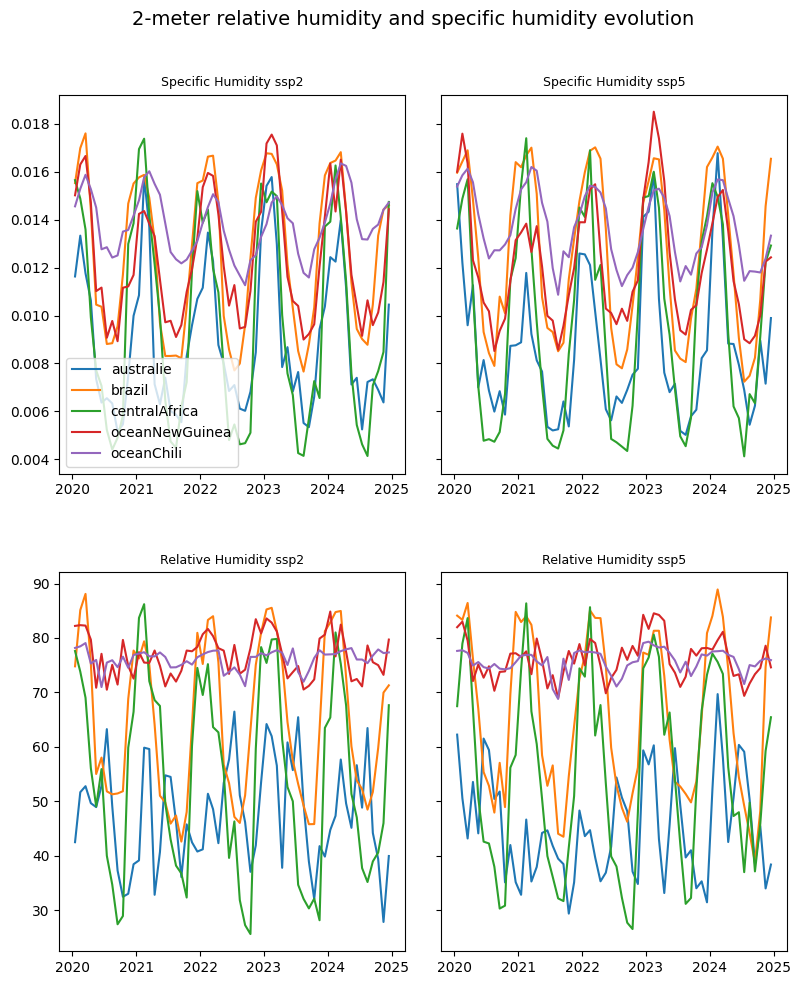

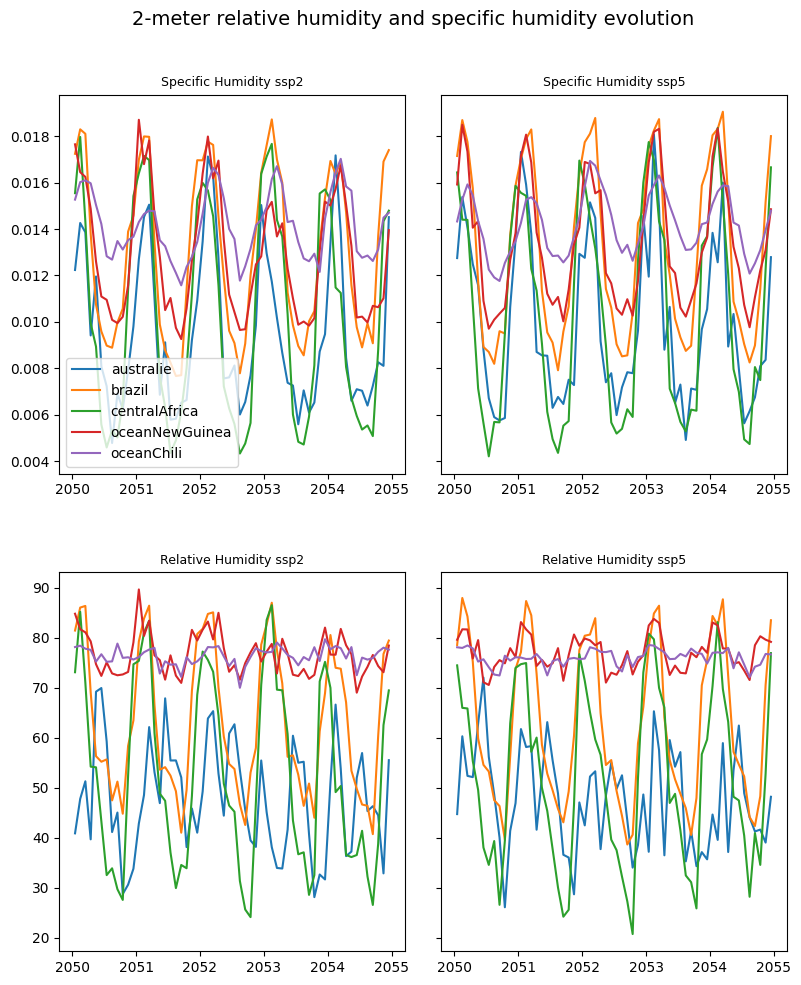

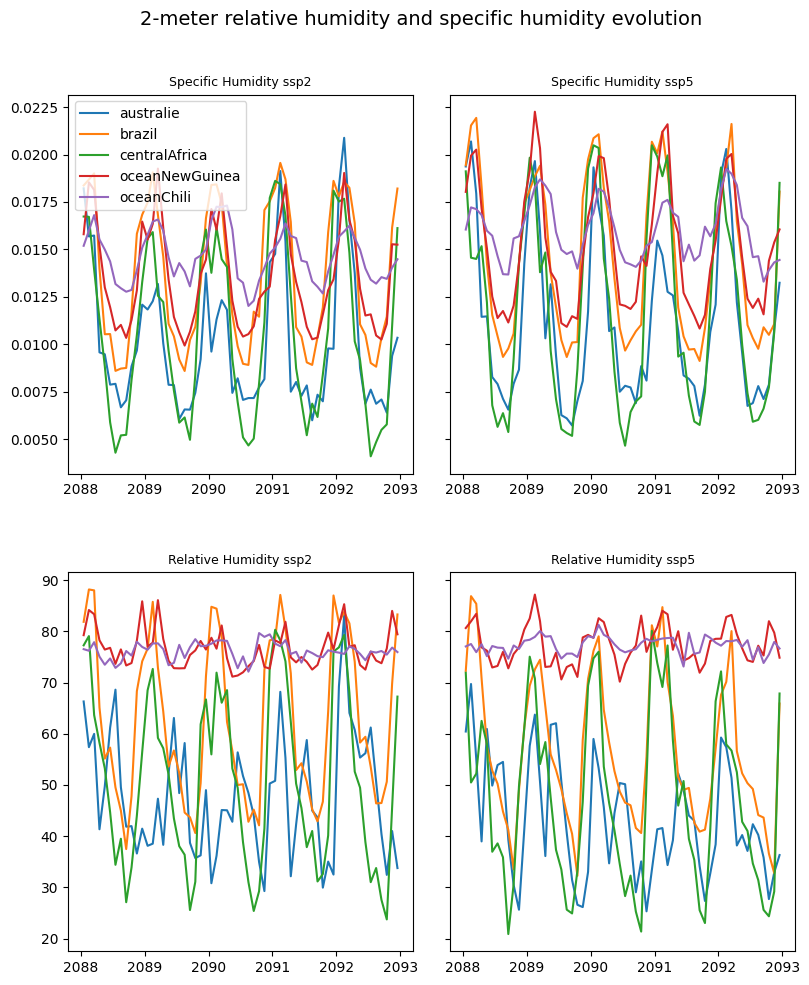

In [47]:
date = [2020,2050,2088]
for d,dat in enumerate(date):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,10), sharey = 'row')
    fig.suptitle('2-meter relative humidity and specific humidity evolution', fontsize=14)
    fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)

    years_plot = 5
    for loc in zones:
        for j,mod in enumerate(model):
            q2m_means = [v100['q2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            rh2m_means = [v100['rh2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            ax[0,j].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], q2m_means, label = '%s' % loc)
            ax[1,j].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], rh2m_means, label = '%s' % loc)
            ax[0,j].set_title('Specific Humidity %s' % mod, fontsize = 9)
            ax[1,j].set_title('Relative Humidity %s' % mod, fontsize = 9)
            if j == 0:
                ax[0,j].legend()
            #plt.savefig('h_above_weak_layer.png')

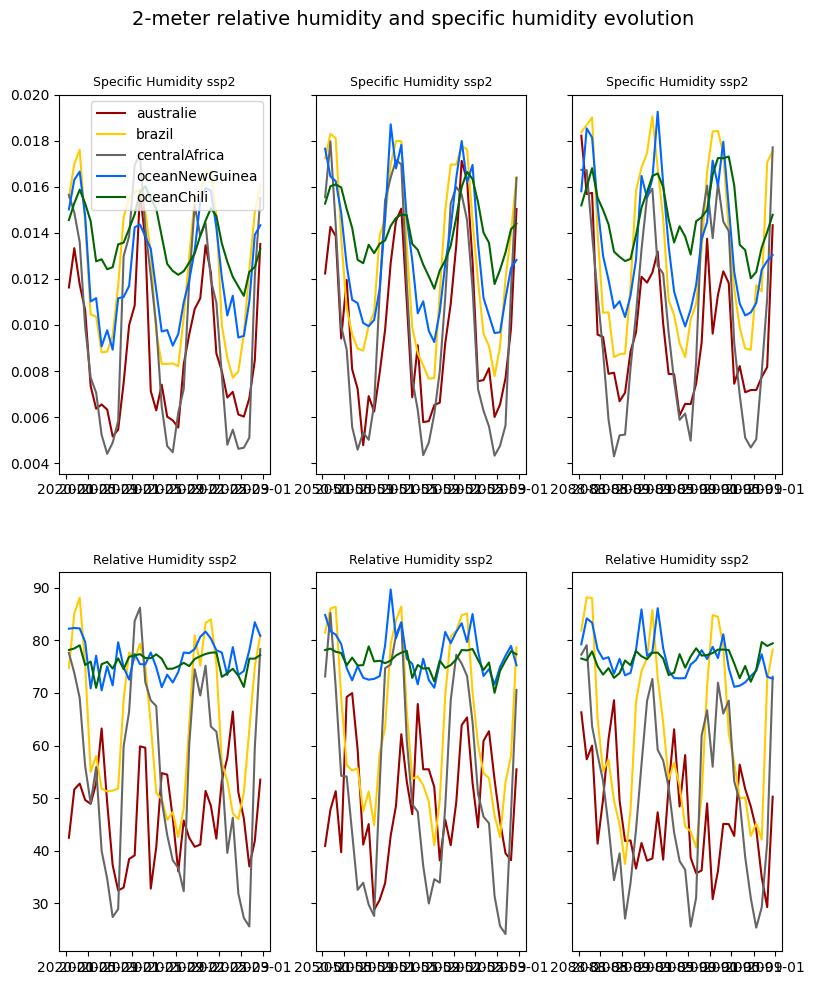

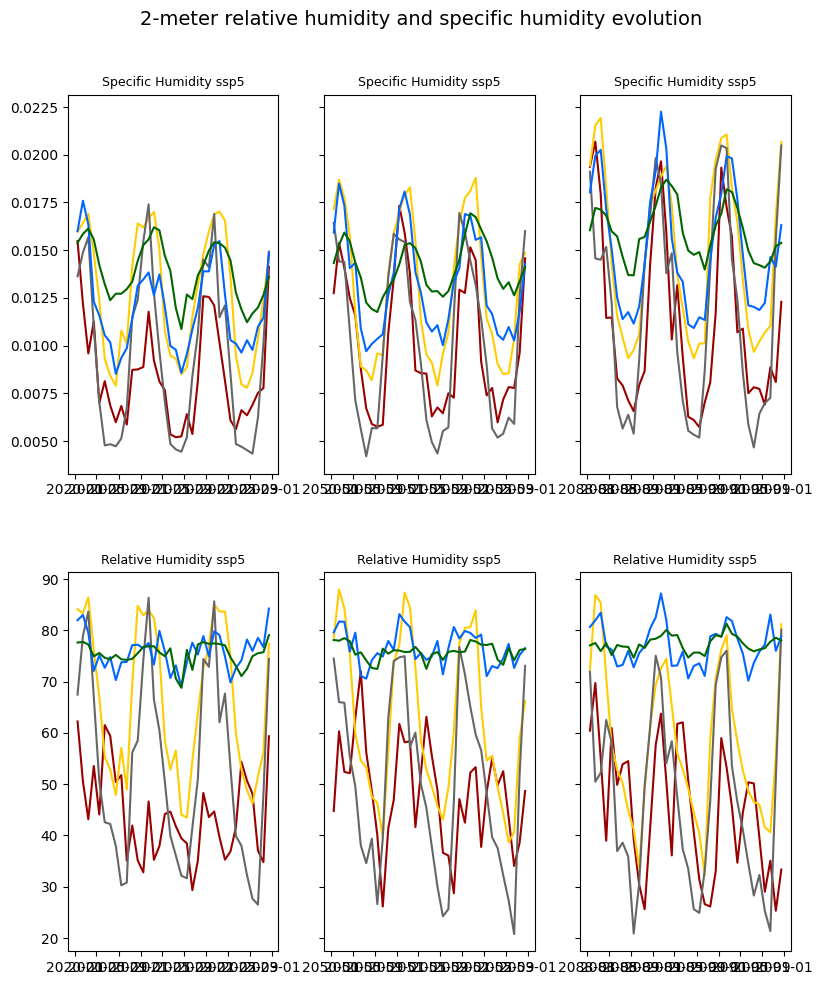

In [48]:
colors_graph = ['#990000','#ffcc00','#666666','#0066ff','#006600']
years_plot = 3
for j,mod in enumerate(model):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (8,10), sharey = 'row')
    fig.suptitle('2-meter relative humidity and specific humidity evolution', fontsize=14)
    fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)
    for l, loc in enumerate(zones):
        for d,dat in enumerate(date):
            q2m_means = [v100['q2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            rh2m_means = [v100['rh2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i] for i in range((dat-2015)*12,(dat-2015)*12+12*years_plot)]
            ax[0,d].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], q2m_means, label = '%s' % loc,color = colors_graph[l])
            ax[1,d].plot(v100['time_array_tropicpacifics_%s_100' % mod][(dat-2015)*12:(dat-2015)*12+12*years_plot], rh2m_means, label = '%s' % loc,color = colors_graph[l])
            ax[0,d].set_title('Specific Humidity %s' % mod, fontsize = 9)
            ax[1,d].set_title('Relative Humidity %s' % mod, fontsize = 9)
            date_format_xaxis = mdates.DateFormatter('%Y')
            #ax.xaxis.set_major_formatter(date_format_xaxis)
        if j == 0:
            ax[0,j].legend()
        #plt.savefig('h_above_weak_layer.png')

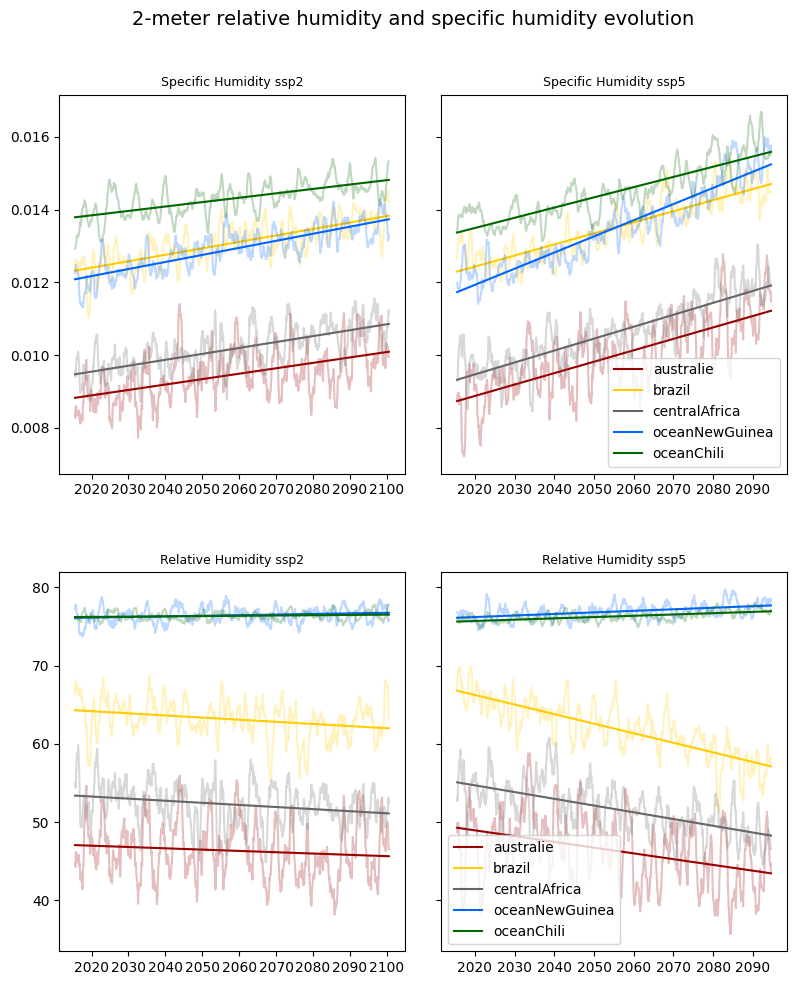

In [49]:
#------------ GRAPHS MATTHIEU ------------#

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,10), sharey = 'row')
fig.suptitle('2-meter relative humidity and specific humidity evolution', fontsize=14)
fig.tight_layout(rect = [0,0,1,.95], h_pad = 5)

colors_graph = ['#990000','#ffcc00','#666666','#0066ff','#006600']

for i,loc in enumerate(zones):
    for j,mod in enumerate(model):
        q2m_means = [sum(v100['q2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i - 6:i + 6]) / 12 for i in range(6, len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5)]
        rh2m_means = [sum(v100['rh2m_constrained_array_%s_%s_100' % (loc, mod)].mean(axis = (1,2))[i - 6:i + 6]) / 12 for i in range(6, len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5)]
        X_q = v100['time_array_%s_%s_100' % (zones_file[i], mod)][6:len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5]
        X_rh = v100['time_array_%s_%s_100' % (zones_file[i], mod)][6:len(v100['time_array_%s_%s_100' % (zones_file[i], mod)]) - 5]
        ax[0,j].plot(X_q, q2m_means, alpha = 0.25, color = colors_graph[i])
        ax[1,j].plot(X_rh, rh2m_means, alpha = 0.25, color = colors_graph[i])
        fit_q = np.polyfit([i for i in range(len(X_q))], q2m_means, 1)
        fit_rh = np.polyfit([i for i in range(len(X_rh))], rh2m_means, 1)
        poly_q = np.poly1d(fit_q)
        poly_rh = np.poly1d(fit_rh)
        ax[0,j].plot(X_q, poly_q([i for i in range(len(X_q))]), label = '%s' % loc, color = colors_graph[i])
        ax[1,j].plot(X_rh, poly_rh([i for i in range(len(X_rh))]), label = '%s' % loc, color = colors_graph[i])
        ax[0,j].set_title('Specific Humidity %s' % mod, fontsize = 9)
        ax[1,j].set_title('Relative Humidity %s' % mod, fontsize = 9)
        if j == 1:
            ax[0,j].legend()
            ax[1,j].legend()

Linear regression between the mean 2-m relative_hum over the island region and the 2-relative_hum over the sea region.
Slope:  -0.2353608515886313
Intercept:  82.70452961655859
Pearson correlation coefficient:  0.4409517803556881
p-value:  1.3737733591130865e-16
Standard error of the estimated slope:  0.02439620686607537 



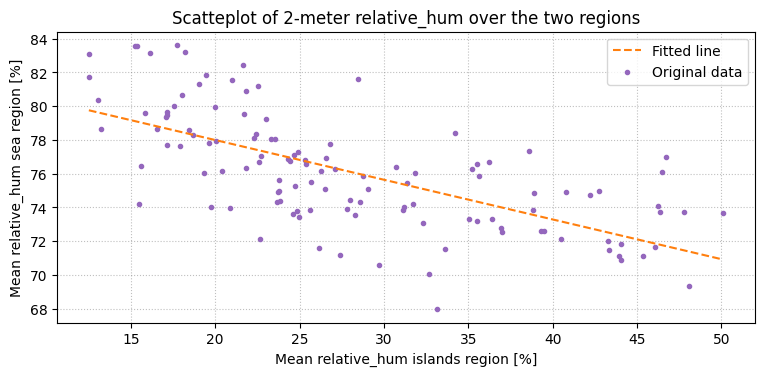

In [40]:
# The points in the previous plot look quite aligned! Let's see what a linear regression between the two sets gives us.
# We will use the scipy library for this task.
# Many other functions (beside the linear regression) are available in scipy, you can have a look at them here: https://docs.scipy.org/doc/scipy/reference/stats.html

# The function is very easy to use: given a series of x (in our case, the mean 2-m relative_hum over the islands) and y (mean 2-m relative_hum over the sea), it returns the following information:
# - slope = the slope of the regression line;
# - intercept = the intercept of the regression line;
# - r_value = the Pearson correlation coefficient;
# - p_value = the p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic (alternative tests can be performed);
# - std_error = the standard error of the estimated slope (gradient), under the assumption of residual normality.
slope, intercept, r, p, se = scipy.stats.linregress(mean_rh2m_zones, mean_rh2m_sea_region)

# First, we can print these values:
print('Linear regression between the mean 2-m relative_hum over the island region and the 2-relative_hum over the sea region.')
print('Slope: ', slope)
print('Intercept: ', intercept)
print('Pearson correlation coefficient: ', r*r)
print('p-value: ', p)
print('Standard error of the estimated slope: ', se, '\n')

# We can visualize the curve associated to the computed slope and intercept over the scatterplot we produced in the previous figure
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.set_aspect('equal')


# BuPlottig first the fitted line, so it appears "below" the points
# We first define an array "x" that contains the values on the x-axis in order
x_array_for_plotting_fit = np.sort(mean_rh2m_zones)
ax.plot(x_array_for_plotting_fit, intercept + slope*x_array_for_plotting_fit, 'tab:orange', ls='--', label='Fitted line')

# Plotting the points exactly as before
ax.scatter(mean_rh2m_zones, mean_rh2m_sea_region, marker='.', color='tab:purple', label='Original data')

# And we add a legend
ax.legend()

# As before, we fnish up the plot with some formatting
ax.set_xlabel('Mean relative_hum islands region [%]')
ax.set_ylabel('Mean relative_hum sea region [%]')
ax.set_title('Scatteplot of 2-meter relative_hum over the two regions')
ax.set_axisbelow(True)
ax.grid(ls=':', c='gray', alpha=0.5)

# 4. Loading variable from CSV files

Another file format that you can encounter while doing your project is the CSV.
Luckily, python has a library dedicated to these files.

Here we will open two example CSV files:
- the first one will contain the coordinates of some rain gauges,
- the second one contains the data collected by these gauges at differnet time steps.

After opening the files, we will load their contend and perform simple operations on their content.

In [43]:
# The loading of CSV files can be performed in a way similar to the procedure we followed for the NetCDF files. 
# First, we define the path to the first CSV file
input_csv_measurements_filepath = './Data/example_measurements.csv'

# We will store the data and the locations in a new type of object, called ordered dictionary.
# You can read more about ordered dictionaries here: https://docs.python.org/3/library/collections.html#ordereddict-objects
csv_measurements_dictionary = OrderedDict()
# Opening the first file file using "with":
with open(input_csv_measurements_filepath) as csv_measurements:
    # We define a csv.reader, with the character "," as delimiter between entries
    csv_measurements_reader = csv.reader(csv_measurements, delimiter=',')
    
    # Let's loop over the first 6 rows and see what's inside the file
    print('Content of the first five rows:\n')
    for idx_row, measurements_row in enumerate(csv_measurements_reader):
        print(', '.join(measurements_row))
        if idx_row > 4:
            break
            
    # Returning at the beginnin of the file
    csv_measurements.seek(0)
    
    # Now we loop over all the row of data, and separate comments, header and actual measurements
    for measurements_row in csv_measurements_reader:
        # Here we separate the rows in three categories:
        if measurements_row[0].startswith('#'):
            # Excluding rows that start with the chraracter "#" (comments)
            continue
        elif measurements_row[0] == 'TIMESTAMP':
            # The header in our case start with the string "TIMESTAMP"
            header_measurement_file = measurements_row
            # We use this header to define the entries in our dictionary
            for header_entry in measurements_row:
                csv_measurements_dictionary[header_entry] = []
        else:
            # The remaining rows contain data
            for idx_in_row, current_measurement in enumerate(measurements_row):
                if current_measurement == '':
                    # Empty measurements will be stored as "nan" (= not a number)
                    csv_measurements_dictionary[header_measurement_file[idx_in_row]].append(np.nan)
                else:
                    # Otherwise, we convert the string that we have read to a floating point number
                    csv_measurements_dictionary[header_measurement_file[idx_in_row]].append(float(current_measurement))

# Let's have a look at our dictionary of measurements
print('\nKeys of the measurment dictionary:', list(csv_measurements_dictionary.keys()))
print('Measurements at the AIE station:', csv_measurements_dictionary['AIE'])
print('Measurements at the AGSTE station:', csv_measurements_dictionary['AGSTE'])

Content of the first five rows:

# Gauge observations at 10min resolution.
# Only hours where at least one observation of 0.1 mm was obtained.
# Unit: mm,  Timestamp: UTC linux time, 
TIMESTAMP, ABO, AGATT, AGSTE, AIE, AIG, AIR, ALS, ALT, AMW, AND, ANT, APP, ARH
1451610600, 0.2, , 0.3, 0, 0, , , 0, , , , , 
1451611200, 0.1, , 0, 0, 0, , , 0.1, , , , , 

Keys of the measurment dictionary: ['TIMESTAMP', 'ABO', 'AGATT', 'AGSTE', 'AIE', 'AIG', 'AIR', 'ALS', 'ALT', 'AMW', 'AND', 'ANT', 'APP', 'ARH']
Measurements at the AIE station: [0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.1]
Measurements at the AGSTE station: [0.3, 0.0, 0.0, 0.1, 0.0, 0.0, nan, nan, nan, nan, nan]


In [45]:
# We repeat the procedure for the CSV file that contains the locations
# We define its path:
input_csv_locations_filepath = './Data/example_locations.csv'
# And the "container" for the data
csv_locations_dictionary = OrderedDict()

# Again we use "with" to open the file
with open(input_csv_locations_filepath) as csv_locations:
    csv_locations_reader = csv.reader(csv_locations, delimiter=',')
    
    # And again we loop over the first 6 rows and see what's inside the file
    print('Content of the first five rows:\n')
    for idx_row, locations_row in enumerate(csv_locations_reader):
        print(', '.join(locations_row))
        if idx_row > 4:
            break
    csv_locations.seek(0)
            
    # We see that this time the station names are on the rows, so the storage of the file content will be slightly different
    for locations_row in csv_locations_reader:
        if locations_row[0] == 'Abbrev':
            # We skip the header row
            continue
        else:
            # We store the value of the coordinates in a small dictionary
            current_location = OrderedDict()
            current_location['Y'] = locations_row[1]
            current_location['X'] = locations_row[2]
            current_location['Z'] = locations_row[3]
            # And this dictionary is stored at the entry denoted by the station name
            csv_locations_dictionary[locations_row[0]]  = current_location
            
# Let's have a look at our dictionary of locations
print('\nKeys of the locations dictionary:', list(csv_locations_dictionary.keys()))
print('Locations of the AIE station:', csv_locations_dictionary['AIE'])
print('Locations of the AGSTE station:', csv_locations_dictionary['AGSTE'])

Content of the first five rows:

Abbrev, Y, X, Z
ABO, 609350, 149001, 1322
AGATT, 646307, 235106, 475
AGSTE, 665026, 249877, 355
AIE, 622940, 212500, 755
AIG, 560405, 130713, 381

Keys of the locations dictionary: ['ABO', 'AGATT', 'AGSTE', 'AIE', 'AIG', 'AIR', 'ALS', 'ALT', 'AMW', 'AND', 'ANT', 'APP', 'ARH']
Locations of the AIE station: OrderedDict([('Y', '622940'), ('X', '212500'), ('Z', '755')])
Locations of the AGSTE station: OrderedDict([('Y', '665026'), ('X', '249877'), ('Z', '355')])


In [46]:
# Havingstored the content of the CSV files into ordered dictionaries, we can perform some "quality of life" changes to some entries.
# The first thing we want to do is to convert the "TIMESTAMP" to a humanly readable date/time.

# We start by creating an empty list, that acts as "container" for the converted data
csv_measurement_time_converted = []
# We can loop over the "TIMESTAMP" list within the measurement diary, and convert all its content
for timestamp_value in csv_measurements_dictionary['TIMESTAMP']:
    # Datetime gives us a function that converts timestamps automatically.
    # You can read more about it here: https://docs.python.org/3/library/datetime.html#datetime.datetime.utcfromtimestamp
    current_datetime_converted = datetime.datetime.utcfromtimestamp(timestamp_value)
    csv_measurement_time_converted.append(current_datetime_converted)
    
# Finally, this list of converted times can be converted to a numpy array.
# This step is not necessary, but if you prefer to work with numpy arrays instead of list, you can perform the conversion simply by doing:
csv_measurement_time_converted_array = np.array(csv_measurement_time_converted)

print('The first 4 entries of the converted array are:\n', csv_measurement_time_converted_array[0:4])

The first 4 entries of the converted array are:
 [datetime.datetime(2016, 1, 1, 1, 10) datetime.datetime(2016, 1, 1, 1, 20)
 datetime.datetime(2016, 1, 1, 1, 30) datetime.datetime(2016, 1, 1, 1, 40)]


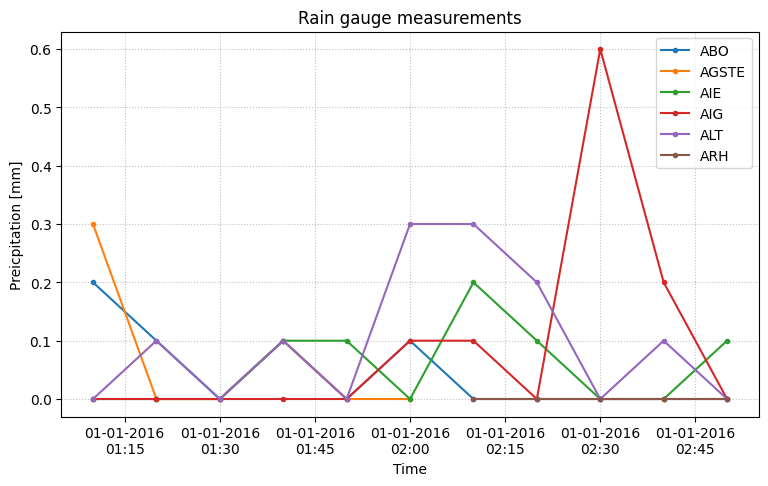

In [47]:
# We can use the converted array to visualize all the measurements
# The plot is performed similarly to the one we did for the time series of 2-meter relative_hum
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

for station_name in csv_measurements_dictionary.keys():
    
    if station_name == 'TIMESTAMP':
        # Of course "TIMESTAMP" is not a station, we don't want to plot its value as mm of precipitation
        continue
    elif np.sum(np.isfinite(csv_measurements_dictionary[station_name])) == 0:
        # We don't want to waste time trying to plot emty time series
        continue
    else:
        ax.plot(csv_measurement_time_converted_array, csv_measurements_dictionary[station_name], marker='.', label=station_name)
ax.legend()

# As before, we fnish up the plot with some formatting
ax.set_xlabel('Time')
ax.set_ylabel('Preicpitation [mm]')
ax.set_title('Rain gauge measurements')
ax.set_axisbelow(True)
ax.grid(ls=':', c='gray', alpha=0.5)
date_format_xaxis = mdates.DateFormatter('%d-%m-%Y\n%H:%M')
ax.xaxis.set_major_formatter(date_format_xaxis)

# 4. Performing temporal averages

A task that you may encounter is the computation of averages over fixed periods of times (e.g. monthly, daily, etc...)
Here we will provide some simple code to perform an average over a fixed time window for a 1 dimensional array, using the csv data loaded in the previous section.
If you have data in a 2-dimensional grid (like in the netCDF example), you can simply apply the same code to each pixel independently.

The way in which we execute the averaging favors clarity over speed of execution.
In case the execution is excessively slow in your application, you can try to have a look at this page for faster alternatives:
https://stackoverflow.com/questions/13728392/moving-average-or-running-mean

However, the code proposed above defines the window size in terms of indices and not in terms of "datetime.timedelta".
You will have to compute the number of indices covered by your desired time window before applying the code.

In [ ]:
# We will now define a function to perform the moving average over a fixed temporal window
# This function will accept in input:
# - a 1-dimensional (numpy) array containing the time associated to the data that we want to average,
# - a 1-dimensional (numpy) array containing the data that we want to average,
# - the size of the window as a "datetime.timedelta" object,
# - an optional value for the start date/time of the averaged output
# - an optional value for the end date/time of the averaged output
# The last two variables are optional: if you don't provide them, the function will pick the start and end of the time array (plus/minus half the window size).
def perform_average_over_sliding_time_window(array1d_time, array1d_measurements, window_size, optional_start_time=None, optional_end_date=None):
    # First we check that the two arrays are indeed numpy arrays an not simply lists
    if type(array1d_time) is list:
        array1d_time = np.array(array1d_time)
    if type(array1d_measurements) is list:
        array1d_measurements = np.array(array1d_measurements)
        
    # To center the window around the current point, we compute the half window size
    half_window = window_size / 2.
    
    # Converting the window (and half window) size to numpy
    window_size = np.array([window_size], dtype="timedelta64[ms]")[0]
    half_window = np.array([half_window], dtype="timedelta64[ms]")[0]

    # If the optional start time has not been provided, we set it equal to the minimum of array1d_time
    if optional_start_time is None:
        optional_start_time = np.min(array1d_time) + half_window
    # Idem for the end date (plus 1 second so we're sure we don't have problems with the "lower than")
    if optional_end_date is None:
        optional_end_date = np.max(array1d_time) - half_window + datetime.timedelta(seconds=1)
    
    # Converting the start/end time to numpy format
    numpy_start_time = np.datetime64(optional_start_time)
    numpy_end_date = np.datetime64(optional_end_date)

    # Using the window size and the start time, we can define a time array to associate to the output averaged array
    array1d_time_averaged = np.arange(optional_start_time, optional_end_date, window_size)
    
    # Create an empty container for the averaged field
    array1d_measurements_averaged = np.full(array1d_time_averaged.shape, np.nan)
    
    # Let's loop over the time array
    for idx_t, t_step in enumerate(array1d_time_averaged):
        # We create a boolean array with all the points in the window
        idx_inside_window = np.logical_and(array1d_time >= t_step - half_window, array1d_time < t_step + half_window)

        # Extract measurements that are in the window
        measurements_in_window = array1d_measurements[idx_inside_window]
        # If any of them is a valid measurement (not a "nan"), we continue with the computation
        if np.sum(np.isfinite(measurements_in_window)):
            # We average the measurement with the "nanmean" function
            array1d_measurements_averaged[idx_t] = np.nanmean(measurements_in_window)

    # Finally, we return the 2 arrays: one with the averaged time, one with all averaged values
    return array1d_time_averaged, array1d_measurements_averaged

In [ ]:
# Let us test the function with two window sizes over the "csv_measurements_dictionary" that we displayed in the previous section
# We define two window sizes for the test:
window_size_30min = datetime.timedelta(minutes=30) # 30 minutes
window_size_60min = datetime.timedelta(hours=1) # 1 hour

# Let us provide the start and end time of the averaging (same for both cases)
start_time_averaging = datetime.datetime(2016,1,1,1,0)
end_time_averaging = datetime.datetime(2016,1,1,3,0)

# Create two empty dictionaries to contain the averaged time arrays
csv_datetime_averaged_30min = OrderedDict()
csv_datetime_averaged_60min = OrderedDict()

# Create two empty dictionaries to contain the averaged data
csv_measurements_averaged_30min = OrderedDict()
csv_measurements_averaged_60min = OrderedDict()

# Let's apply the averaging to all the stations with at least 1 valid measurement
for station_name in csv_measurements_dictionary.keys():
    if station_name == 'TIMESTAMP':
        # Of course "TIMESTAMP" is not a station, we don't want to plot its value as mm of precipitation
        continue
    elif np.sum(np.isfinite(csv_measurements_dictionary[station_name])):
        current_averaged_time_30min, current_averaged_measurements_30min = perform_average_over_sliding_time_window(csv_measurement_time_converted_array,
                                                                                                                    csv_measurements_dictionary[station_name],
                                                                                                                    window_size_30min,
                                                                                                                    start_time_averaging,
                                                                                                                    end_time_averaging)
        current_averaged_time_60min, current_averaged_measurements_60min = perform_average_over_sliding_time_window(csv_measurement_time_converted_array,
                                                                                                                    csv_measurements_dictionary[station_name],
                                                                                                                    window_size_60min,
                                                                                                                    start_time_averaging,
                                                                                                                    end_time_averaging)
        # Assiginign the array to the correct key in the dictionary
        csv_datetime_averaged_30min[station_name] = current_averaged_time_30min
        csv_datetime_averaged_60min[station_name] = current_averaged_time_60min
        
        csv_measurements_averaged_30min[station_name] = current_averaged_measurements_30min
        csv_measurements_averaged_60min[station_name] = current_averaged_measurements_60min

In [ ]:
# We can visualize the averaging output in a figure with three panels:
# - the first shows the original time series
# - the second shows the 30 minutes average
# - the third shows the 1 hour average
fig, axes = plt.subplots(3, 1, figsize=(9, 11))

# We can loop directly over the "csv_measurements_averaged_30min" dictionary, since it only contains stations with valid measurements
for idx_station, station_name in enumerate(csv_measurements_averaged_30min.keys()):
    # We assign a different name to each axis to reduce confusion
    ax_noave = axes[0] # <- the first axis, for the original time series
    ax_30min = axes[1] # <- the first axis, for the 30 minutes average
    ax_60min = axes[2] # <- the first axis, for the 1 hour average

    # We plot each time series on a different axis
    ax_noave.plot(csv_measurement_time_converted_array, csv_measurements_dictionary[station_name], marker='.', label=station_name)
    ax_30min.plot(csv_datetime_averaged_30min[station_name], csv_measurements_averaged_30min[station_name], marker='s', label=station_name)
    ax_60min.plot(csv_datetime_averaged_60min[station_name], csv_measurements_averaged_60min[station_name], marker='^', label=station_name)

    # Let's differenciate the panels with titles that briefly describe their content
    ax_noave.set_title('Original rain gauge measurements')
    ax_30min.set_title('Rain gauge measurements averaged over 30 minutes')
    ax_60min.set_title('Rain gauge measurements averaged over 60 minutes')

# The formatting is the same for all the axis, so we can simply loop over all of them and call all the functions
for ax in axes:
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Preicpitation [mm]')
    ax.set_title('Rain gauge measurements')
    ax.set_axisbelow(True)
    ax.grid(ls=':', c='gray', alpha=0.5)
    date_format_xaxis = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_format_xaxis)
    
    # Let us set the same limits on the y-axis to each panel, so they are easier to compare
    ax.set_ylim((-0.02, 0.62)) # We know the values from the previous plot

# We let matplotlib to figure out the optimal distance between panels/labels/etc...
plt.tight_layout()